## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 3
## Linear and MultiLinear Regression

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [342]:
df = pd.read_csv("../data/forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [343]:
print(df.shape)

(517, 13)


In [344]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_low = Q1 - 1.5*IQR
    df_hi = Q3 + 1.5*IQR
    new_df = df[(df[col] < df_hi) & (df[col] > df_low)].reset_index(drop=True)
    return new_df

df = removeOutliers(df,'RH')
df = removeOutliers(df,'temp')

In [345]:
df.dropna()
print(df.shape)

(489, 13)


In [346]:
x = df[['RH']]
y = df[['temp']]

In [347]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [348]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(342, 1) (147, 1) (342, 1) (147, 1)


In [349]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [350]:
print(reg.coef_)
print(reg.intercept_)

[[-0.1836675]]
[27.25685327]


In [351]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


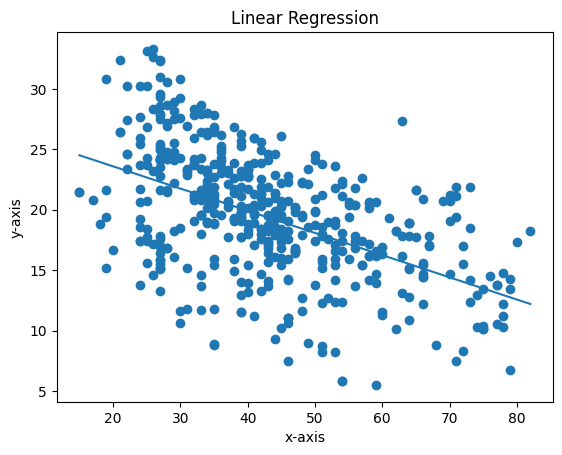

In [352]:
plt.scatter(x, y)
plt.plot(x_range, y_pred)

plt.title("Linear Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [353]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(mse)
print(r)

17.987354865615817
0.2641986022149869


In [354]:
df['RH'].corr(df['temp'])

-0.5099888150137052

In [355]:
df.shape

(489, 13)

In [356]:
columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']
for col in columns:
    df = removeOutliers(df,col)

In [357]:
print(df.shape)

(272, 13)


In [358]:
x1 = np.column_stack((df[['X']], df[['Y']], df[['FFMC']], df[['DMC']], df[['DC']], df[['ISI']], df[['temp']], df[['RH']], df[['wind']], df[['rain']]))
y1 = df[['area']]

In [359]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [360]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(190, 10) (82, 10) (190, 1) (82, 1)


In [361]:
reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [362]:
print(reg1.coef_)
print(reg1.intercept_)

[[-1.63402032e-01 -2.68943946e-02  3.50930176e-01  9.23945455e-04
   5.57895404e-05 -1.25617037e-01 -7.47617472e-04 -2.03309106e-02
   4.25197467e-02  1.11035484e+00]]
[-27.51208901]


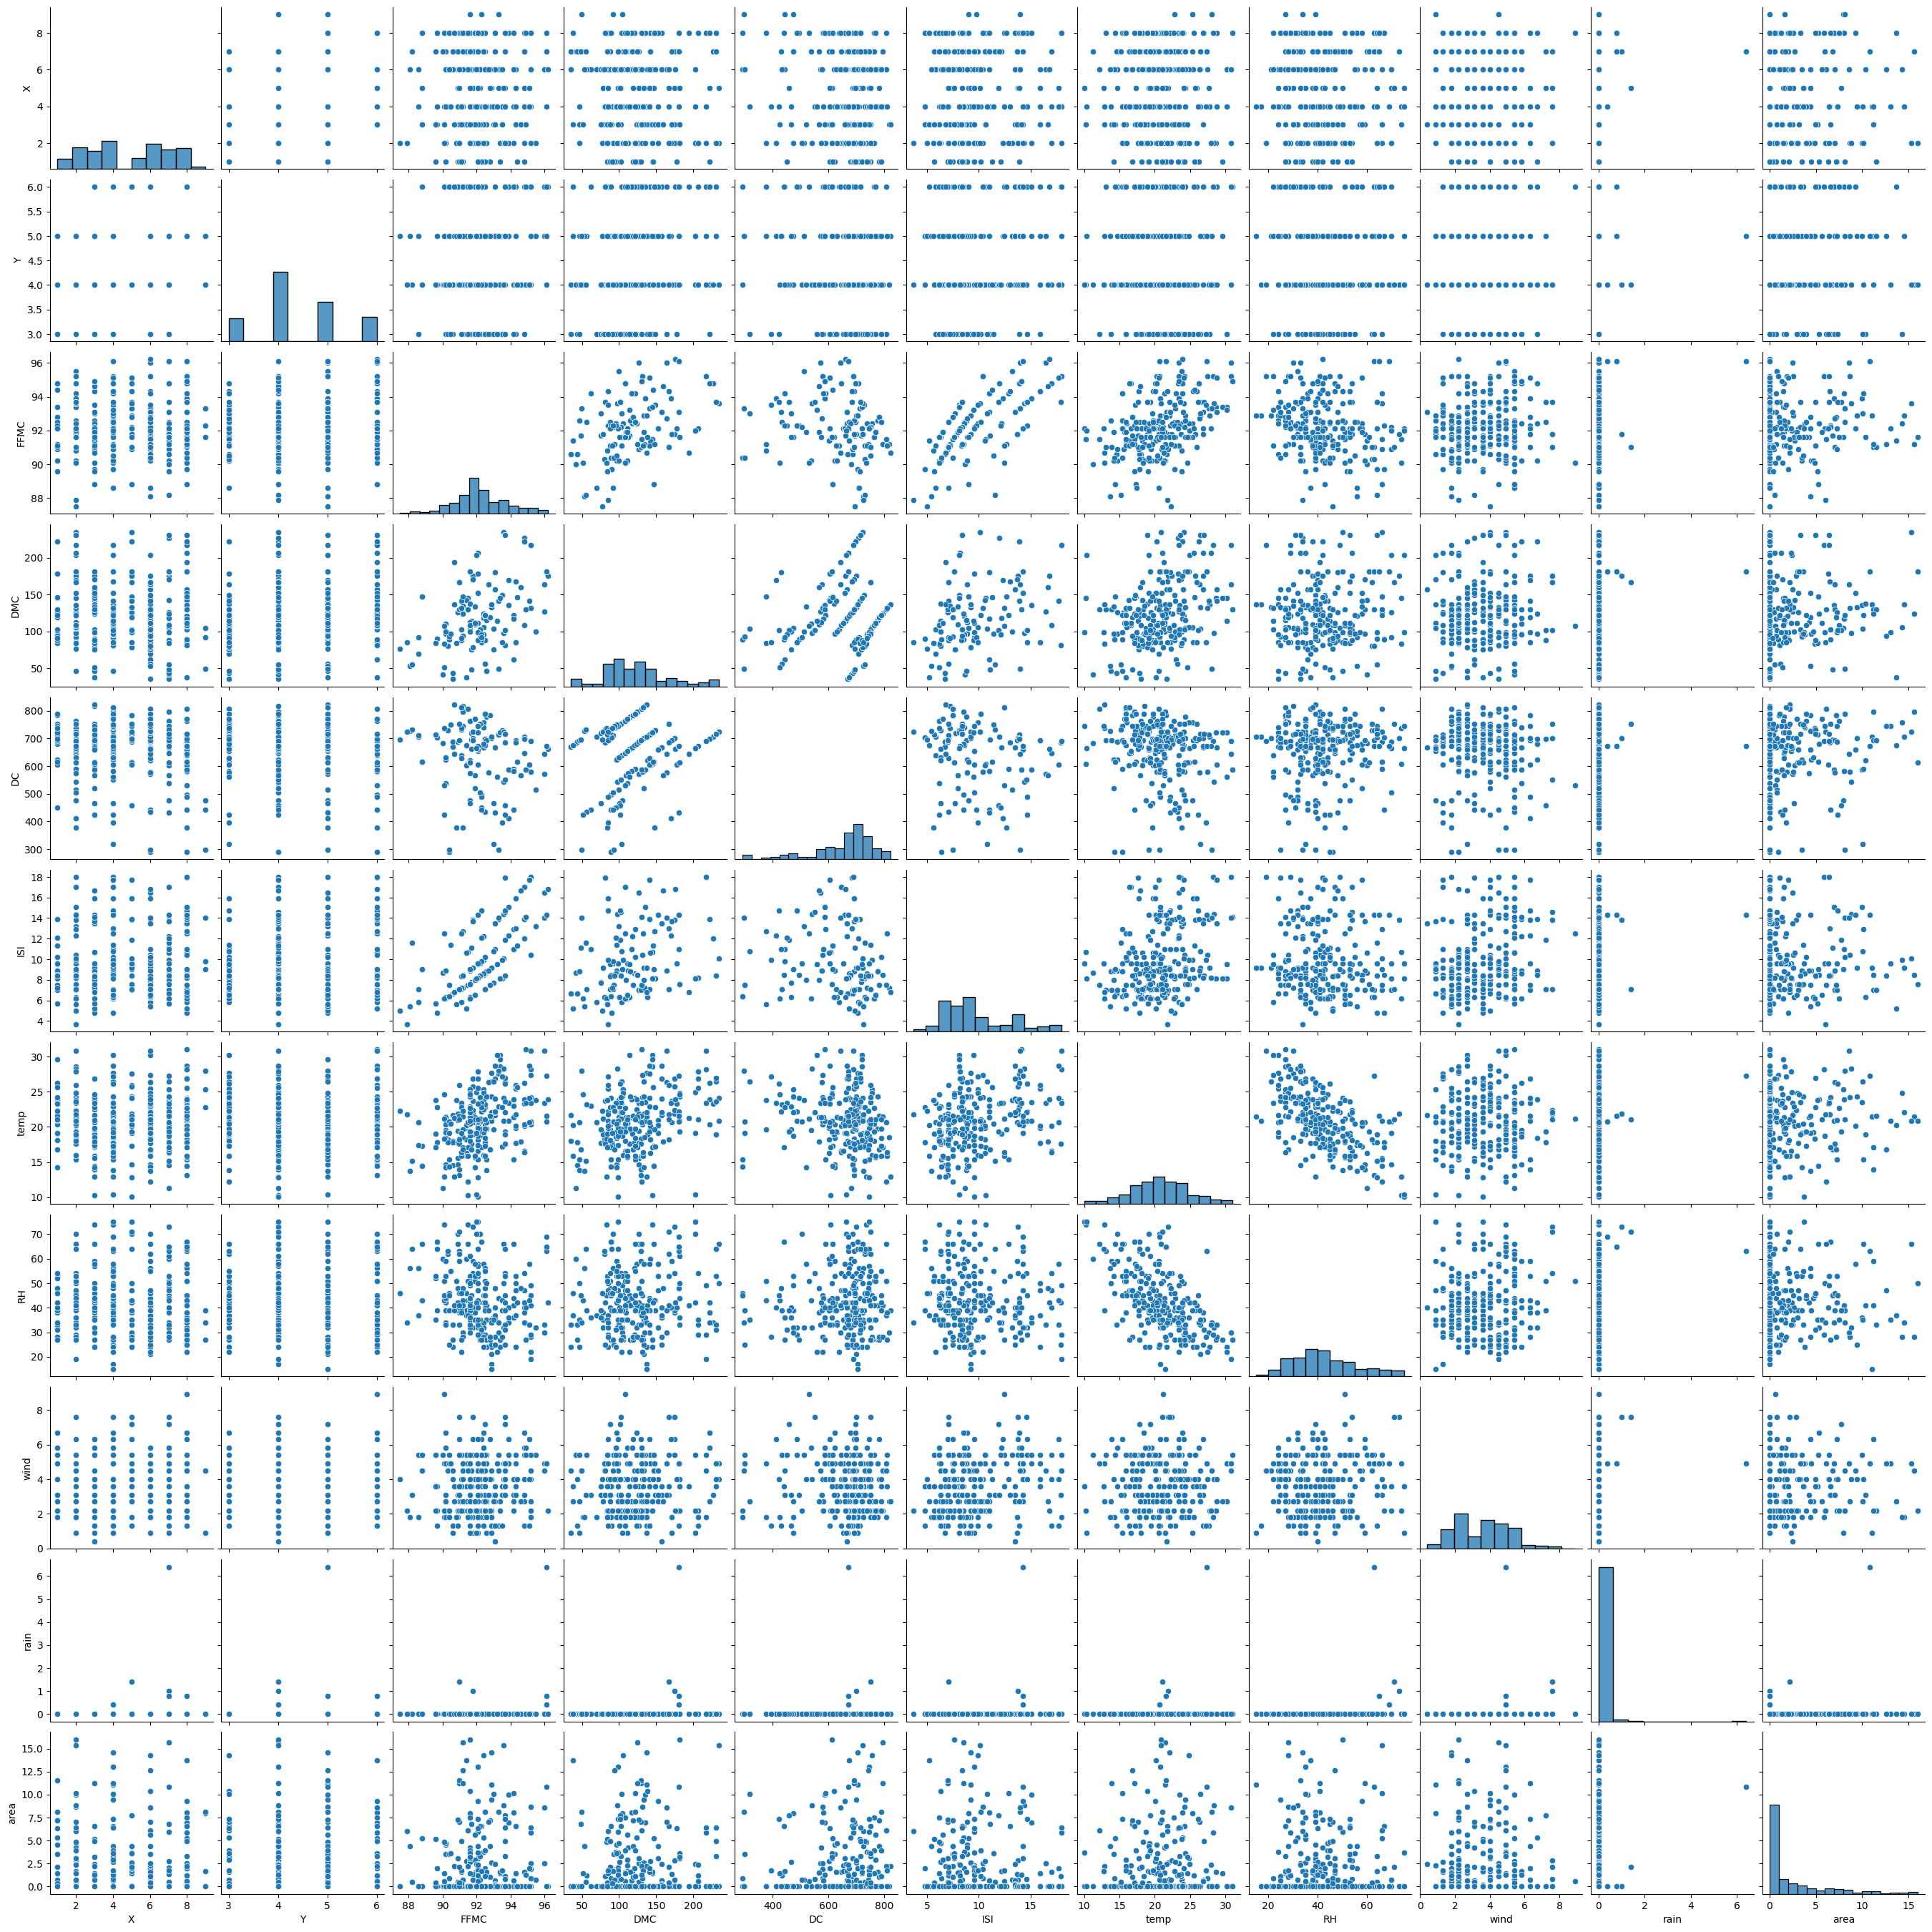

In [365]:
sns.pairplot(df)

In [364]:
y1_pred = reg1.predict(x1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r1 = r2_score(y1_test, y1_pred)
print(mse1)
print(r1)

13.51026239004332
-0.05263060798902219
